In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
%matplotlib inline

다음 분기에 어떤 게임을 설계해야 할까
----

Data Description
----

- Name : 게임의 이름입니다.<br>
- Platform : 게임이 지원되는 플랫폼의 이름입니다.<br>
- Year : 게임이 출시된 연도입니다.<br>
- Genre : 게임의 장르입니다.<br>
- Publisher : 게임을 제작한 회사입니다.<br>
- NA_Sales : 북미지역에서의 출고량입니다.<br>
- EU_Sales : 유럽지역에서의 출고량입니다.<br>
- JP_Sales : 일본지역에서의 출고량입니다.<br>
- Other_Sales : 기타지역에서의 출고량입니다.<br>

결측값
----
- Unnamed: 0  : 0 ____index?
- Name          0 ____중복있음(플랫폼별로)
- Platform         0
- Year           271____SplashDown ps2는 2001.11 작품인데 해당 데이터에는 1로 설정되어있음 
- Genre           50
- Publisher       58 ____ unknwon값으로 제작회사 미상이 있음

> Sales 데이터들 전부 object로 되어있다.
- NA_Sales         0
- EU_Sales         0
- JP_Sales         0
- Other_Sales      0

<hr><br>
판매 수량에서 M,K 다수 포함 되어있다 중간중간에 0M도 확인된다.

K는 1,000
M는 1,000,000
<hr>




In [4]:
csv_file = '/content/drive/MyDrive/project01/vgames2.csv'
df = pd.read_csv(csv_file)

df.head()
df.drop(columns='Unnamed: 0',inplace=True)

In [5]:
# 결측치 확인 return dataframe
def select_Nan_data(col_name):
  nan_data = df[df[col_name].isnull()]
  return nan_data
# 제작자 미상의 데이터 확인 
def publisher_Unknown():
  unknown = df[df['Publisher']=='Unknown']
  return unknown
# 중복값 확인 

def overlab_view(col_name):
  overlab_len = df.duplicated([col_name]).sum()
  overlab_data = df[df.duplicated([col_name])].sort_values(by=col_name)
  return overlab_data,overlab_len

# sale 값 M,K 값 계산 및 문자열 변경
def sales_type():
  for i in all_sales.index:
    for j in all_sales:
      if('K'in str(all_sales[j][i])):
        all_sales[j][i] = re.sub('K','',all_sales[j][i])
        all_sales[j][i] = float(all_sales[j][i])*1000
        # print('in K')
      elif('M' in str(all_sales[j][i])):
        all_sales[j][i] = re.sub('M','',all_sales[j][i])
        all_sales[j][i] = float(all_sales[j][i])*1000000
        # print('in M')
      else:
        all_sales[j][i] =float(all_sales[j][i])
  for i in all_sales:
    all_sales[i] = pd.to_numeric(all_sales[i])

#결측치 제거 함수 
def m_value(data,col_name,value):
  data[col_name].fillna(value,inplace=True)
  
# year 형변환, 결측치 제거 
def year_type():
  for i in year_df['Year']:
     if(np.isnan(i) == True):
      #  print(i)
       year_df['Year'][i]=np.nan
  year_df.dropna(subset=['Year'],inplace=True)
  year_df.astype({'Year':'int'})

def year_eda(data):
  if 21<data<100:
    return int(data+1900)
  elif data <=21:
    return int(data+2000)
  else:
    return int(data)
    
def top(data,n,val):
  sort_data =data.sort_values(by=val, ascending=False)[:n]
  sort_data.reset_index(inplace=True)
  sort_data.drop(columns='index',inplace=True)
  return sort_data

def genre_top(n):
  test4_1 = top(year_df,n,"NA_Sales") 
  test4_2 = top(year_df,n,"EU_Sales") 
  test4_3 = top(year_df,n,"JP_Sales") 
  test4_4 = top(year_df,n,"Other_Sales") 
  test4_5 = top(year_df,n,"Total_Sales") 

  
  plt.figure(figsize = (40,10))
  fig, ax = plt.subplots(ncols=5)
  sns.set(rc = {'figure.figsize':(40,15)})
  sns.countplot(x="Genre", data=test4_1 ,ax=ax[0]);
  ax[0].set(title = f"NA_Sales Top{n}")
  sns.countplot(x="Genre", data=test4_2 ,ax=ax[1]);
  ax[1].set(title = f"EU_Sales Top{n}")
  sns.countplot(x="Genre", data=test4_3 ,ax=ax[2]);
  ax[2].set(title = f"JP_Sales Top{n}")
  sns.countplot(x="Genre", data=test4_4 ,ax=ax[3]);
  ax[3].set(title = f"Other_Sales Top{n}")
  sns.countplot(x="Genre", data=test4_5 ,ax=ax[4]);
  ax[4].set(title = f"Total_Sales Top{n}")


In [6]:
# Sale 전처리
all_sales =df[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']]
sales_type()
# 총 판매량 (Name기준)
all_sales['Total_Sales'] = all_sales['NA_Sales']+all_sales['EU_Sales']+all_sales['JP_Sales']+all_sales['Other_Sales']
# df['volume'] = all_sales['Total_Sales']
for i in all_sales:
  df[i]=all_sales[i]
# print(all_sales.dtypes)
# print(df.dtypes)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

크롤링으로 결측치 다시 불러와서 처리해주기
----
colab에서 불러와지지 않는 것 같다. 
VScode로 불러와서 csv파일로 저장했다.

In [7]:
year_df = df.copy()
data_crawling = pd.read_csv('/content/drive/MyDrive/project01/fill_nan.csv')
data_crawling.dropna(inplace=True)
def change_nan(row):
    for count,value in enumerate(data_crawling['Name']):
      if(row['Name']==value):
        row['Year']=int(data_crawling['Year'].iloc[count])
      else:
        pass


for i in range(len(year_df)):
  change_nan(year_df.iloc[i])

year_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00,0.04
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25


In [8]:
# ['Year'] 결측치 
year_df.reset_index(inplace=True)
year_df.drop(columns='index',inplace=True)
print(year_df.shape)
year_type()
year_df['Year']=year_df['Year'].apply(year_eda)
year_df.sort_values(by='Year')


(16598, 10)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
9226,Bridge,2600,1980,Misc,Activision,0.25,0.02,0.00,0.00,0.27
5723,Asteroids,2600,1980,Shooter,Atari,4.00,0.26,0.00,0.05,4.31
14264,Boxing,2600,1980,Fighting,Activision,0.72,0.04,0.00,0.01,0.77
12314,Ice Hockey,2600,1980,NaN,Activision,0.46,0.03,0.00,0.01,0.50
5938,Kaboom!,2600,1980,Misc,Activision,1.07,0.07,0.00,0.01,1.15
...,...,...,...,...,...,...,...,...,...,...
7177,Terraria,3DS,2016,Action,505 Games,0.00,0.03,0.04,0.00,0.07
15233,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017,Role-Playing,Sega,0.00,0.00,0.01,0.00,0.01
5310,Brothers Conflict: Precious Baby,PSV,2017,Action,Idea Factory,0.00,0.00,0.01,0.00,0.01
10107,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017,Role-Playing,Sega,0.00,0.00,0.03,0.00,0.03


연도별 판매량(시장 전체)
---

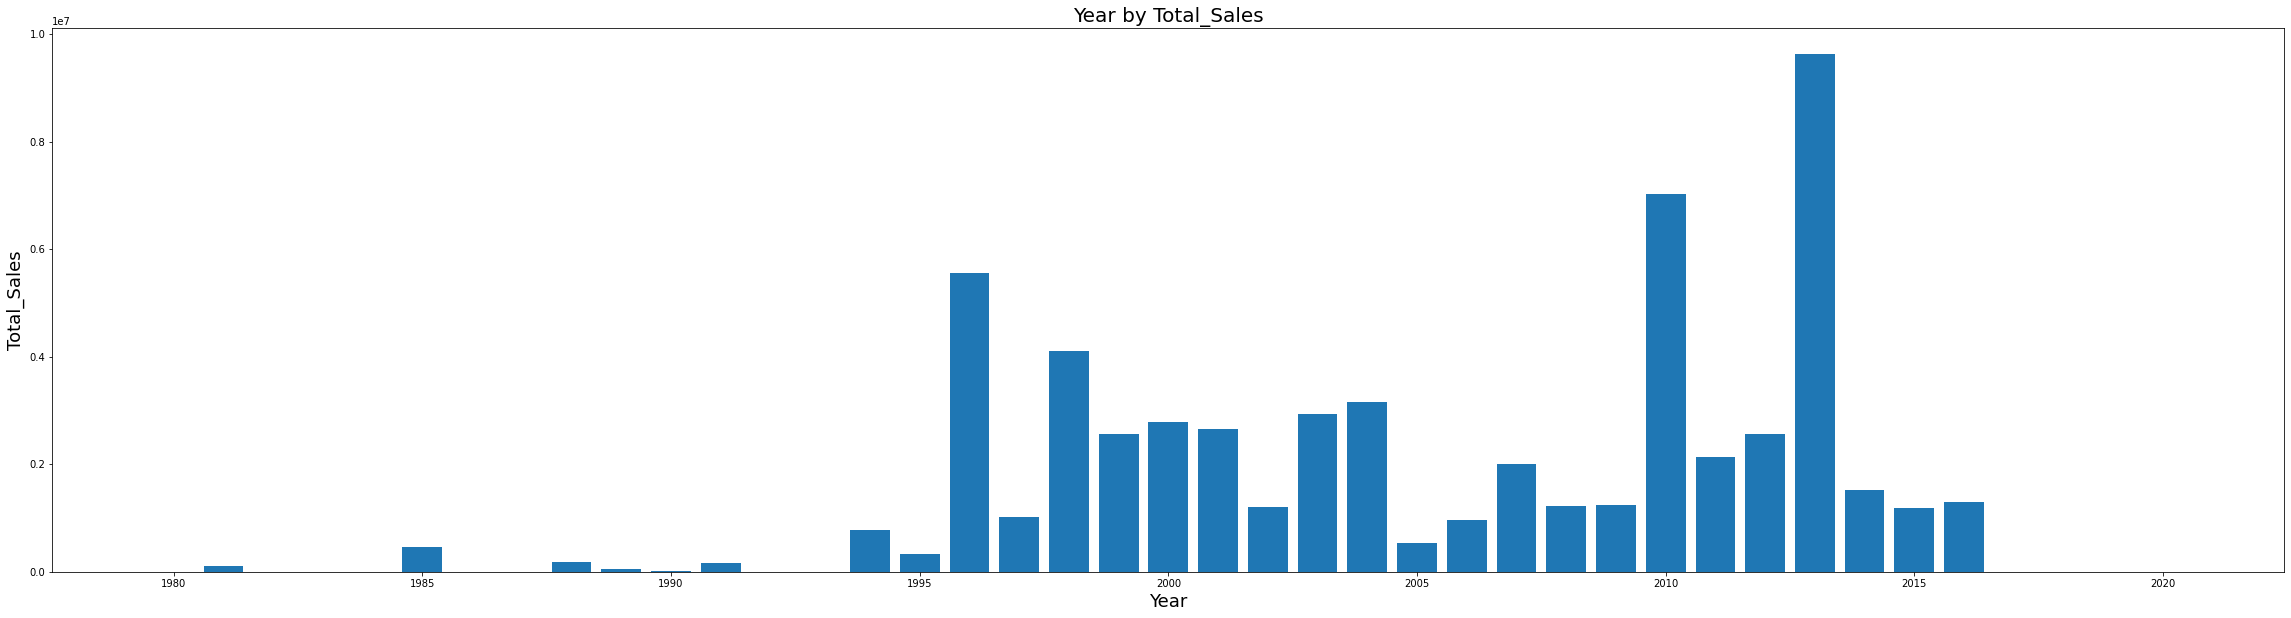

In [9]:
plt.figure(figsize = (40,10))
plt.bar(year_df['Year'], year_df['Total_Sales'])
plt.title('Year by Total_Sales', fontsize=20)
plt.xlabel('Year', fontsize=18)
plt.ylabel('Total_Sales', fontsize=18)
# plt.xticks(Year, label, fontsize=15)
plt.show()

연도에따른 플랫폼별 판매량
---

In [10]:
import plotly.express as px
import plotly.offline as pyo
import plotly.graph_objs as go

test = year_df.groupby(by=['Year','Platform','Name']).sum().reset_index()
bar_list = []
for count,value in enumerate(df['Platform'].unique()):
  globals()[f'bar_{count}'] = go.Bar(x=test[test['Platform'] == value].Year,
                                     y=test[test['Platform'] == value].Total_Sales, 
                                     name=value)
  
# 동적할당은 나중에 연습해보자!
# data = [getattr(mod, f'{idx}' for idx in bar_list)] 

data = [bar_1,bar_2,bar_3,bar_4,bar_5,bar_6,bar_7,bar_8,bar_9,bar_10,
        bar_11,bar_12,bar_13,bar_14,bar_15,bar_16,bar_17,bar_18,bar_19,bar_20,
        bar_21,bar_22,bar_23,bar_24,bar_25,bar_26,bar_27,bar_28,bar_29,bar_30]
layout = go.Layout(title='연도별 출고량',barmode='stack')
fig = go.Figure(data=data, layout=layout)
pyo.iplot(fig)
#연도,플랫폼 별  출고량 

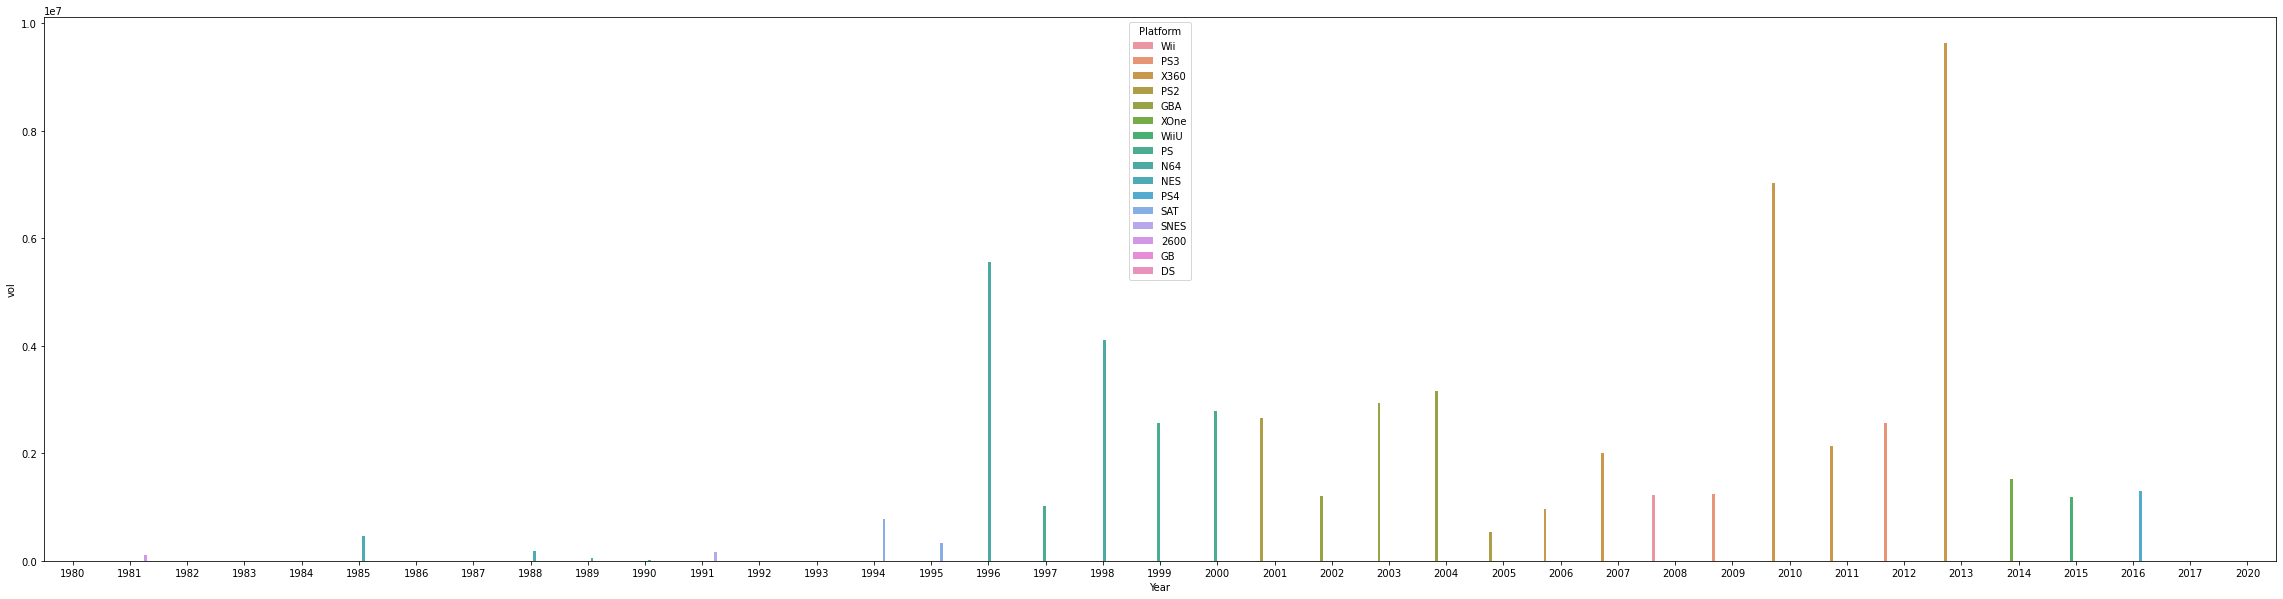

In [11]:
# len_list = []
# for i in df['Platform'].unique():
#   p1 = test[test['Platform']==i]
#   len_list.append(len(p1))
#   if(len_)
plat_sorted_df = year_df[['Year','Platform','Total_Sales']]
# plat_sorted_df = plat_sorted_df.groupby(by=['Year','Platform']).sum()
# plat_sorted_df.sort_values(by='Year')
plat_sorted_df
for i in (plat_sorted_df['Year'].unique()):
  
  ttt = plat_sorted_df[plat_sorted_df['Year']==i]
  temp = ttt.sort_values(by=['Year','Total_Sales'],ascending=[True,False]).reset_index().drop(columns='index')
  globals()[f'p{i}']  = temp.iloc[0]

plat_sorted = pd.DataFrame()  
temp_list =[]
temp_list2 =[]
for i in plat_sorted_df['Year'].unique():
   temp_list.append(globals()[f'p{i}']['Platform'])
   temp_list2.append(globals()[f'p{i}']['Total_Sales'])

plat_sorted['Year'] = plat_sorted_df['Year'].unique()
plat_sorted['Platform']= temp_list
plat_sorted['vol'] =temp_list2

# plat_sorted.sort_values(by='Year')
plt.figure(figsize = (40,10))
sns.barplot(x = 'Year', y = 'vol' , data = plat_sorted, hue ='Platform', ci = 'sd');

In [12]:
plat_sorted.sort_values(by='Year')

,Year,Platform,vol
37,1980,2600,4.31
33,1981,2600,110001.86
26,1982,2600,7.81
31,1983,NES,3.20
17,1984,NES,28.31
20,1985,NES,460001.04
35,1986,NES,6.50
25,1987,NES,4.38
32,1988,NES,190007.27
34,1989,NES,60000.00


연도에 따른 지역별 판매량
---

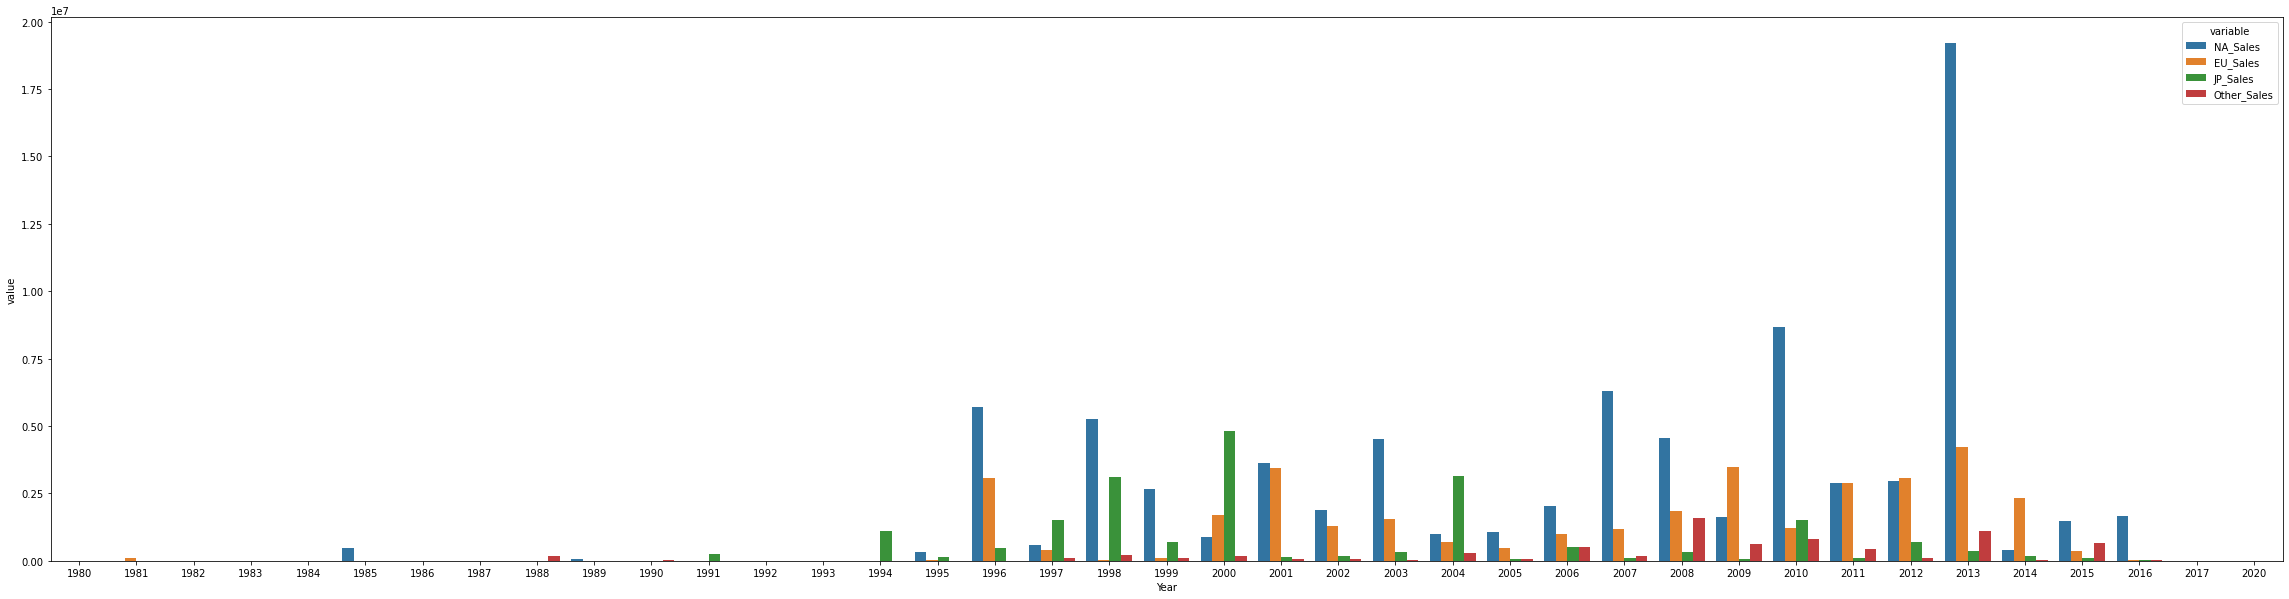

In [13]:
#연도,지역별 판매량 
test2 = year_df.groupby(by=['Year']).sum().reset_index()
melt_test2 = test2.melt(id_vars = 'Year', value_vars = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'])
plt.figure(figsize = (40,10))
sns.barplot(x = 'Year', y = 'value', data = melt_test2, hue = 'variable', ci = 'sd');

In [36]:
# # 2013년 내림차순 정렬 
test[test['Year'] == 2013].sort_values(by='Total_Sales',ascending=False)


# # # 출고량의 평균 
sales_mean = (df['Total_Sales'].sum())/(len(df['Total_Sales']))
#gta5_xbox_ver 출고량 
gta5 =df[(df['Name']=="Grand Theft Auto V") & (df['Year']==2013)&(df['Platform']=="X360")].Total_Sales.values[0]
mario_k_64 = df[(df['Name']=="Mario Kart 64") & (df['Year']==1996	)&(df['Platform']=="N64")].Total_Sales.values[0]
#gta5 평균과의 차이 
print("평균과의 차이 : ",int(gta5)/int(sales_mean))

평균과의 차이 :  1112.6523396880416


Grand Theft Auto V ==> GTA 5<br>
본격적으로 비디오게임 시장이 활성화 된 시기는 <br>
1994년도를 기점으로 1996년에 시작된것을 알수있다.<br>
가장 판매기록을 많이 새운 시기는 2013년도 이며 , <br>
이때 대부분의 사람들이 알고있는 gta5가 출시되었다.<br>
이떄의 기록은 평균 판매율에 1000배 가까운 차이를 내며 히트를 내었다.

연도별 장르선호도
---

In [41]:

test3 = year_df.groupby(by=['Year','Genre','Total_Sales']).sum().reset_index()
data_list=[]
for count,value in enumerate(df['Genre'].unique()):
  globals()[f'bar2_{count}'] = go.Bar(x=test3[test3['Genre'] == value].Year,
                                     y=test3[test3['Genre'] == value].Total_Sales, 
                                     name=value)
  
  # data_list.append(f'bar2_{count}')
  
data = [bar2_0,bar2_1,bar2_2,bar2_3,bar2_4,bar2_5,bar2_6,bar2_7,bar2_8,bar2_9,bar2_10,bar2_11,bar2_12]
layout = go.Layout(title='연도별 장르선호',barmode='stack')
fig = go.Figure(data=data, layout=layout)
pyo.iplot(fig)
#최대 최소값 그래프 필요

장르별로 보았을때 어느정도 판매성과는 올리고 있다.
하지만 액션과 슈팅장르의 게임들이 상대적으로 다른 장르들에 비해서 출고량이 높게 나타나고
어드벤처나,퍼즐장르는 다른 장르들에 비해서 출고량이 낮은것으로 보인다.

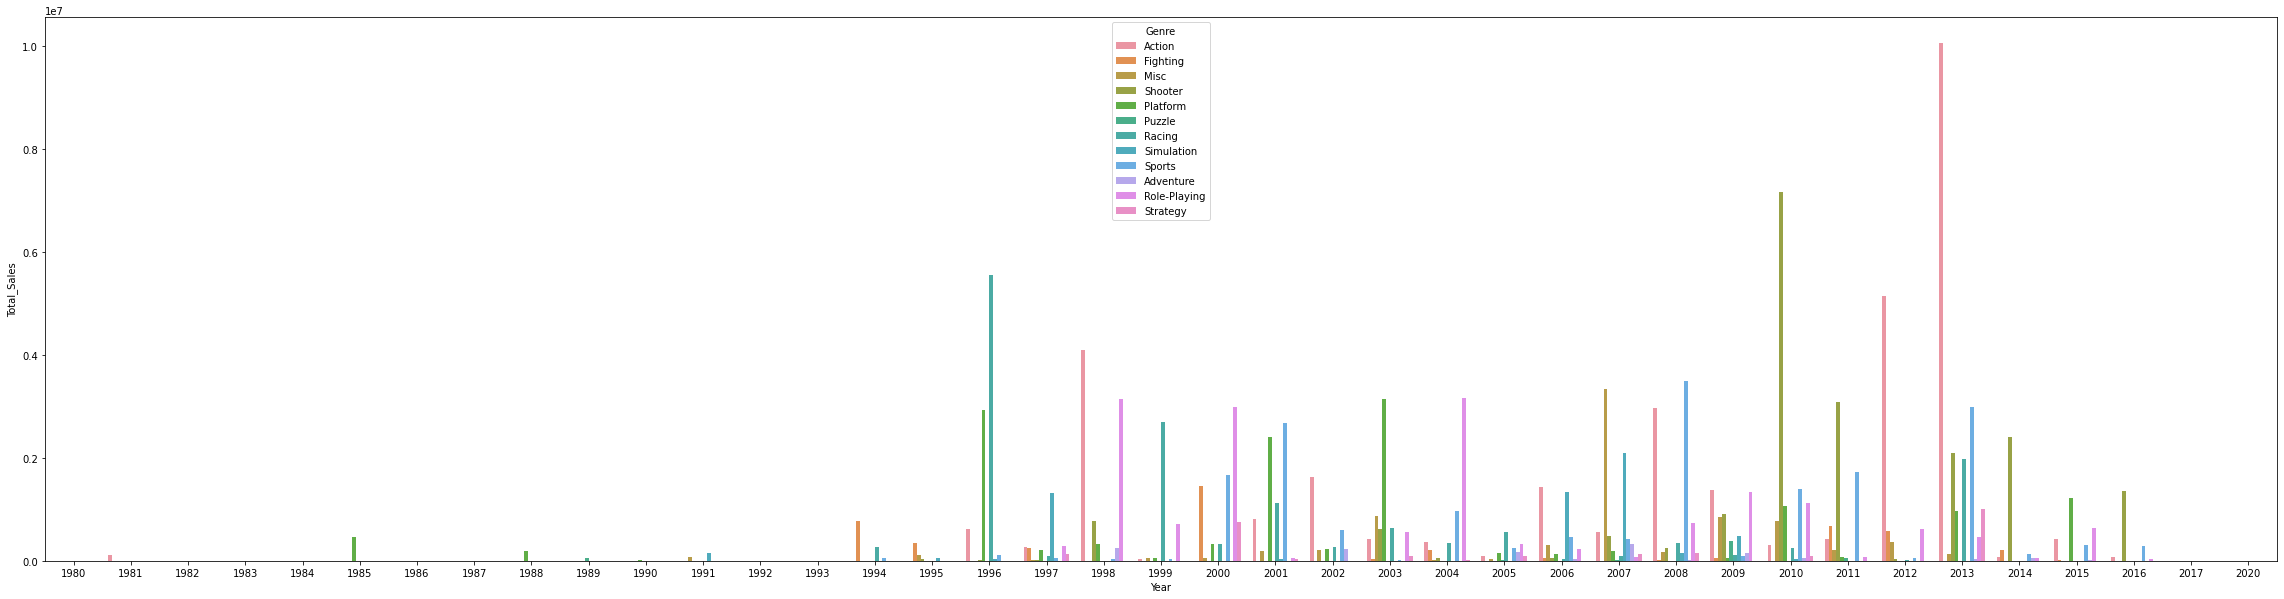

In [16]:
test3_1 = year_df.groupby(by=['Year','Genre']).sum().reset_index()
test3_1= test3_1[['Year','Genre','Total_Sales']]

test3_1.sort_values(by=["Year","Total_Sales"], ascending=[False,False]).reset_index().drop(columns="index")
test3_2 = test3_1[test3_1['Year']>1996]
plt.figure(figsize = (40,10))
# 전체 장르별 그래프
sns.barplot(x = 'Year', y = 'Total_Sales', data = test3_1, hue = 'Genre', ci = 'sd');
# 1996년 이후 장르별 그래프
# sns.barplot(x = 'Year', y = 'Total_Sales', data = test3_2, hue = 'Genre', ci = 'sd');

지역별 장르 선호도 TOP5
---

<Figure size 2880x720 with 0 Axes>

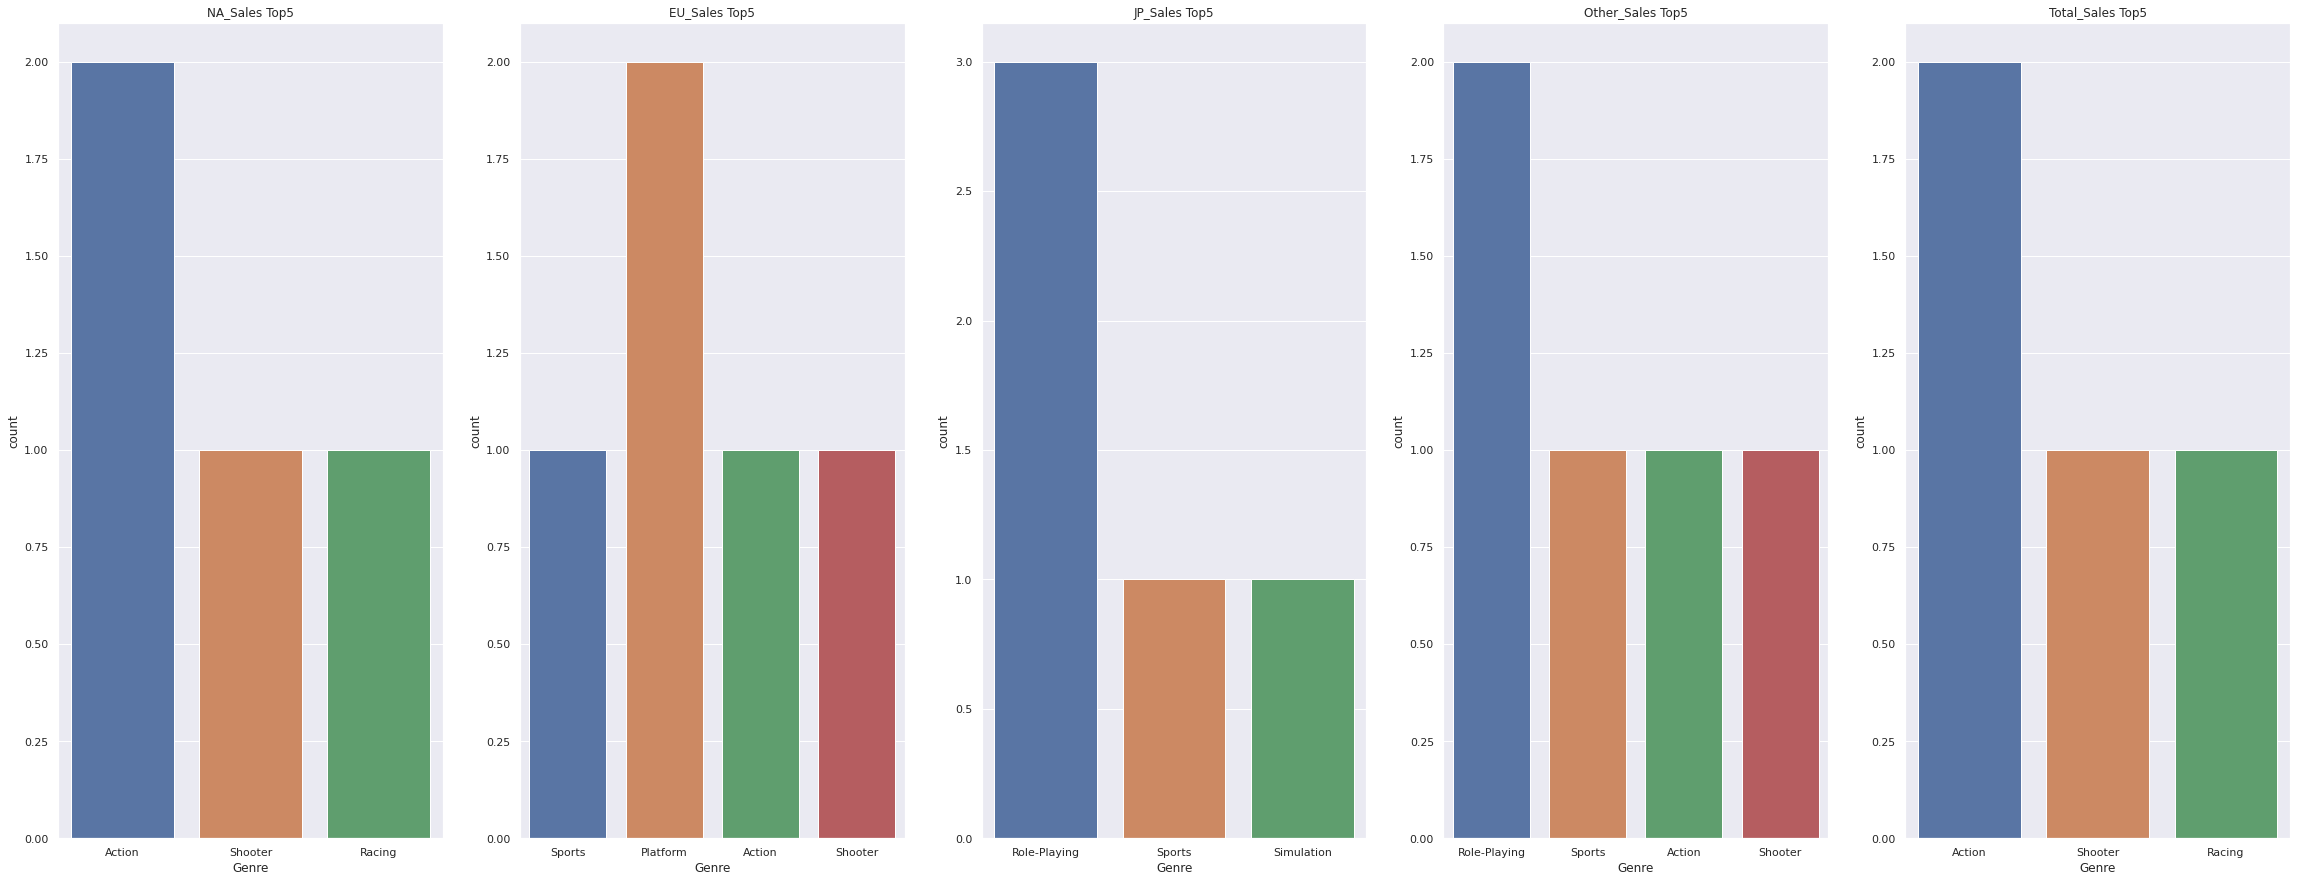

In [38]:
genre_top(5)

지역별 장르선호도
---

In [18]:
genre_local_df = year_df[['Genre','NA_Sales','EU_Sales','JP_Sales','Other_Sales']]

genre_local_sort = genre_local_df.groupby(by=['Genre']).sum()

max_temp=[]
genre_temp=[]
na_max = max(genre_local_sort['NA_Sales'])
eu_max = max(genre_local_sort['EU_Sales'])
jp_max = max(genre_local_sort['JP_Sales'])
other_max = max(genre_local_sort['Other_Sales'])

na_genre = genre_local_sort[genre_local_sort['NA_Sales']==na_max].reset_index()
eu_genre = genre_local_sort[genre_local_sort['EU_Sales']==eu_max].reset_index()
jp_genre = genre_local_sort[genre_local_sort['JP_Sales']==jp_max].reset_index()
other_genre = genre_local_sort[genre_local_sort['Other_Sales']==other_max].reset_index()

# print(na_max,na_genre['Genre'].values[0])
# print(eu_max,eu_genre['Genre'].values[0])
# print(jp_max,jp_genre['Genre'].values[0])
# print(other_max,other_genre['Genre'].values[0])
local_genre = pd.DataFrame({"NA":[na_max,na_genre['Genre'].values[0]],
                            "EU":[eu_max,eu_genre['Genre'].values[0]],
                            "JP":[jp_max,jp_genre['Genre'].values[0]],
                            "Other":[other_max,other_genre['Genre'].values[0]]})
local_genre=local_genre.T
local_genre.columns=['vol','genre']
local_genre

,vol,genre
NA,2.14708e+07,Action
EU,7.62019e+06,Platform
JP,1.17803e+07,Role-Playing
Other,1.62006e+06,Role-Playing


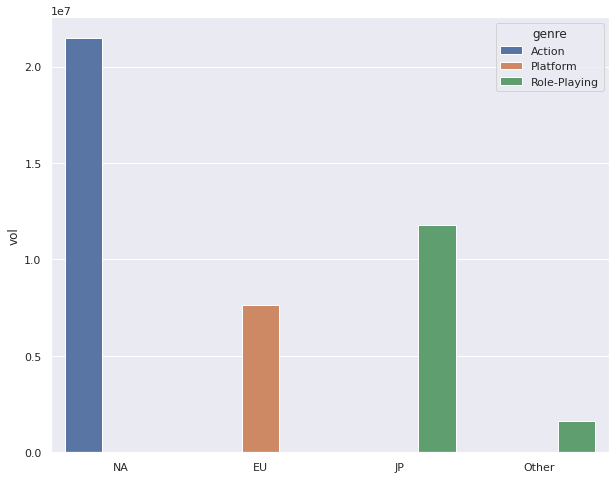

In [19]:
plt.figure(figsize = (10,8))
sns.barplot(x = local_genre.index, y = local_genre.vol, data = local_genre, hue = local_genre.genre, ci = 'sd');

In [20]:
Platform_local_df = year_df[['Platform','NA_Sales','EU_Sales','JP_Sales','Other_Sales']]

Platform_local_sort = Platform_local_df.groupby(by=['Platform']).sum()

max_temp=[]
genre_temp=[]
na_max = max(Platform_local_sort['NA_Sales'])
eu_max = max(Platform_local_sort['EU_Sales'])
jp_max = max(Platform_local_sort['JP_Sales'])
other_max = max(Platform_local_sort['Other_Sales'])

na_Platform = Platform_local_sort[Platform_local_sort['NA_Sales']==na_max].reset_index()
eu_Platform = Platform_local_sort[Platform_local_sort['EU_Sales']==eu_max].reset_index()
jp_Platform = Platform_local_sort[Platform_local_sort['JP_Sales']==jp_max].reset_index()
other_Platform = Platform_local_sort[Platform_local_sort['Other_Sales']==other_max].reset_index()


local_Platform = pd.DataFrame({"NA":[na_max,na_Platform['Platform'].values[0]],
                               "EU":[eu_max,eu_Platform['Platform'].values[0]],
                               "JP":[jp_max,jp_Platform['Platform'].values[0]],
                               "Other":[other_max,other_Platform['Platform'].values[0]]})
local_Platform=local_Platform.T
local_Platform.columns=['vol','Platform']
local_Platform

,vol,Platform
NA,2.20106e+07,X360
EU,6.81033e+06,PS3
JP,6.38013e+06,PS
Other,1.76008e+06,X360


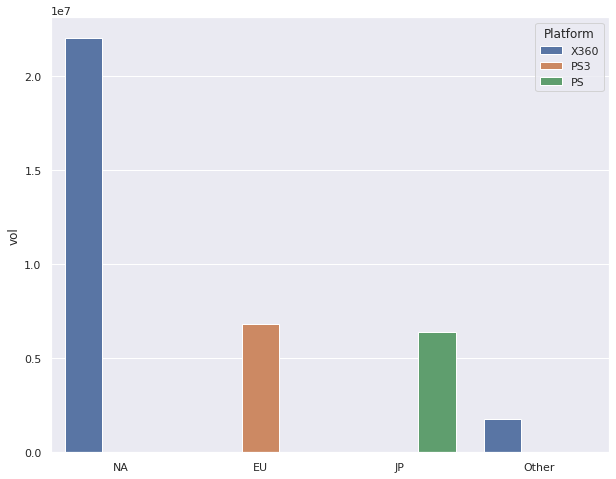

In [21]:
plt.figure(figsize = (10,8))
sns.barplot(x = local_Platform.index, y = local_Platform.vol, data = local_Platform, hue = local_Platform.Platform, ci = 'sd');

제작사별 판매량 
----


In [22]:
year_df['Publisher'].fillna("Unknown",inplace=True)

publisher_df = year_df[['Total_Sales','Publisher']]
publisher_df = publisher_df.groupby('Publisher').sum().reset_index()
# publisher_df =publisher_df.sort_values(by='Total_Sales',ascending=False).reset_index().drop(columns ='index')
publisher_df_top5= publisher_df.sort_values(by='Total_Sales',ascending=False).reset_index().drop(columns ='index').head(5)

In [23]:
import plotly.graph_objects as go
fig = go.Figure(
    data=[go.Bar(x=publisher_df['Publisher'],y=publisher_df['Total_Sales'])],
)
fig.show()

In [24]:
fig = go.Figure(
    data=[go.Bar(x=publisher_df_top5['Publisher'],y=publisher_df_top5['Total_Sales'])],
    layout_title_text="Top 5 publisher"
)
fig.show()

In [40]:
sales_a_df = year_df.copy()
sales_a_df=sales_a_df.sort_values(by='Total_Sales',ascending=False).reset_index().drop(columns='index').head(5)
sales_a_df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Grand Theft Auto V,X360,2013,Action,Take-Two Interactive,9630000.0,5.31,0.06,1.38,9630006.75
1,Halo: Reach,X360,2010,Shooter,Microsoft Game Studios,7030000.0,1.98,0.08,0.78,7030002.84
2,Mario Kart 64,N64,1996,Racing,Nintendo,5550000.0,1.94,2.23,0.15,5550004.32
3,Pokemon X/Pokemon Y,3DS,2013,NaN,Nintendo,5170000.0,4.05,4.34,0.79,5170009.18
4,The Legend of Zelda: Ocarina of Time,N64,1998,Action,Nintendo,4100000.0,1.89,1.45,0.16,4100003.50


가장많이팔린 게임들!
---

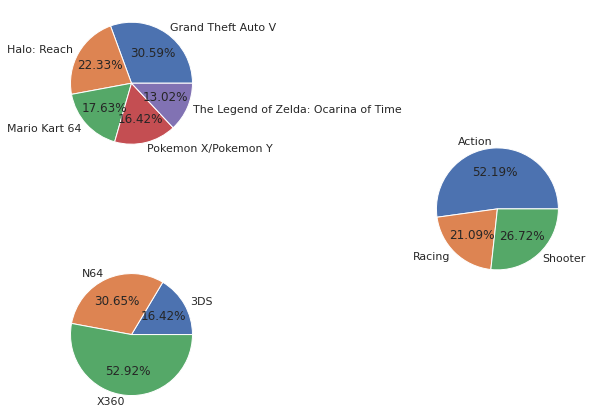

In [26]:
import matplotlib.pyplot as plt
 
fig = plt.figure(figsize=(8,8))
fig.set_facecolor('white')

plt.rcParams["figure.figsize"] = (40,10)
plt.subplot(2,3,1)
plt.pie(x=sales_a_df.Total_Sales,labels=sales_a_df.Name,autopct=lambda p : '{:.2f}%'.format(p)) ;

sales_a_df2 = sales_a_df.groupby(by='Platform').sum().reset_index()
plt.subplot(2,3,4)
plt.subplots_adjust(left=0.2, bottom=0.1, right=1.5, top=0.9, wspace=0.2, hspace=0.2)
plt.pie(x=sales_a_df2.Total_Sales,labels=sales_a_df2.Platform,autopct=lambda p : '{:.2f}%'.format(p)) ;


sales_a_df2 = sales_a_df.groupby(by='Genre').sum().reset_index()
plt.subplot(1,3,3)
plt.subplots_adjust(left=0.1, bottom=0.1, right=1, top=0.9, wspace=0.2, hspace=0.2)
plt.pie(x=sales_a_df2.Total_Sales,labels=sales_a_df2.Genre,autopct=lambda p : '{:.2f}%'.format(p)) ;


In [27]:
# sales_a_df3 = sales_a_df[['Total_Sales','NA_Sales','EU_Sales','JP_Sales','Other_Sales']].sum()
# sales_a_df3_1 = sales_a_df3[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']]

# plt.subplot(2,2,4)
# plt.subplots_adjust(left=0.1, bottom=0.1, right=1.5, top=0.9, wspace=0.2, hspace=0.2)

# plt.pie(x=[int(sales_a_df3.NA_Sales)/int(sales_a_df3.Total_Sales),
#            int(sales_a_df3.EU_Sales)/int(sales_a_df3.Total_Sales),
#            int(sales_a_df3.JP_Sales)/int(sales_a_df3.Total_Sales),
#            int(sales_a_df3.Other_Sales)/int(sales_a_df3.Total_Sales)],
#         labels = sales_a_df3_1.index,);

해당 데이터를 이용한 총매출과 다른데이터들간의 상관관계에 대해서 
----

상관계수를 구하기 위해서는 데이터가 **continous** 해야된다!<br>

>장르 데이터를 연속된값(0-10)으로 변경해준다. <BR>
>제작사 데이터(0-575)를 연속된 값으로 변경 해준다.<br>
>플랫폼 데이터(0-30)를 연속된 값으로 변경 해준다.

In [28]:
sales_a = year_df.copy()
sales_a=sales_a.iloc[:,1:]
genre = ['Action', 'Adventure', 'Misc', 'Platform', 'Sports', 'Simulation',
       'Racing', 'Role-Playing', 'Puzzle', 'Strategy', 'Fighting',
       'Shooter']
for count_i,value_i in enumerate(genre):
  for count_j,value_j in enumerate(sales_a.Genre):
    # print(count_j)
    if(value_j == value_i ):
      sales_a.Genre.iloc[count_j] = int(count_i)
    else:
      pass

for count_i,value_i in enumerate(sales_a.Publisher.unique()):
  for count_j,value_j in enumerate(sales_a.Publisher):
    # print(count_j)
    if(value_j == value_i ):
      sales_a.Publisher.iloc[count_j] = int(count_i)
    else:
      pass
for count_i,value_i in enumerate(sales_a.Platform.unique()):
  for count_j,value_j in enumerate(sales_a.Platform):
    # print(count_j)
    if(value_j == value_i ):
      sales_a.Platform.iloc[count_j] = int(count_i)
    else:
      pass

print('sales_a.Genre.isnull :',sales_a.Genre.isnull().sum())



sales_a.Platform = sales_a.Platform.astype("int64")
sales_a.Genre = sales_a.Genre.apply(pd.to_numeric, errors='coerce') # flaot 형 nan값 처리
sales_a.Publisher = sales_a.Publisher.astype("int64")


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



sales_a.Genre.isnull : 50


In [29]:
sales_a.corr(method='pearson')

,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
Platform,1.000000,-0.196056,0.021724,0.002642,0.016118,0.009399,0.006256,0.000996,0.019521
Year,-0.196056,1.000000,-0.136657,-0.050507,0.003020,0.002621,-0.022339,0.013676,-0.002303
Genre,0.021724,-0.136657,1.000000,0.017604,0.000373,0.002792,0.013625,0.008879,0.006357
Publisher,0.002642,-0.050507,0.017604,1.000000,-0.010181,-0.009819,-0.002909,-0.011091,-0.014138
NA_Sales,0.016118,0.003020,0.000373,-0.010181,1.000000,0.001661,-0.001028,0.005614,0.878434
EU_Sales,0.009399,0.002621,0.002792,-0.009819,0.001661,1.000000,-0.001069,-0.001779,0.361346
JP_Sales,0.006256,-0.022339,0.013625,-0.002909,-0.001028,-0.001069,1.000000,-0.000357,0.305295
Other_Sales,0.000996,0.013676,0.008879,-0.011091,0.005614,-0.001779,-0.000357,1.000000,0.073764
Total_Sales,0.019521,-0.002303,0.006357,-0.014138,0.878434,0.361346,0.305295,0.073764,1.000000


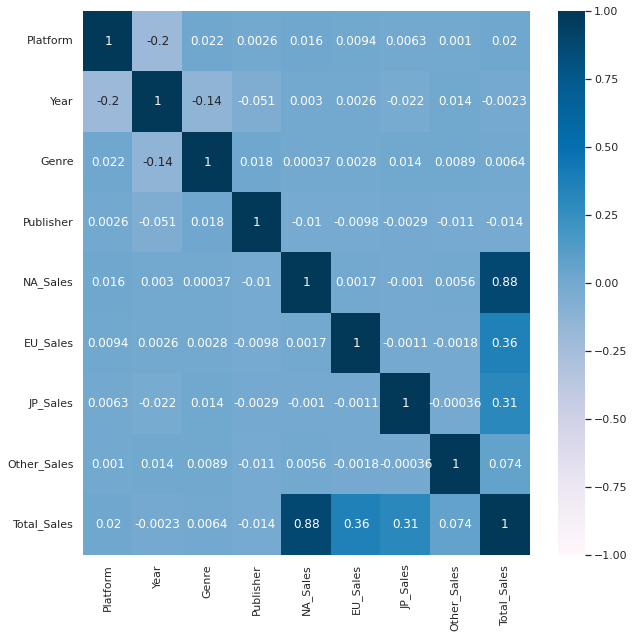

In [30]:
import seaborn as sb
plt.rcParams["figure.figsize"] = (10,10)
sb.heatmap(sales_a.corr(method='pearson'),
           annot = True,
           cmap = 'PuBu',
           vmin = -1, vmax=1 ,
          );

In [31]:
#미국시장의 경쟁사
na_sort_df = year_df.sort_values(by='NA_Sales',ascending=False).reset_index().drop(columns='index').head(10)
na_sort_df['Genre'][3]="Role-Playing"
na_sort_df.groupby('Publisher').sum().reset_index().sort_values(by='NA_Sales',ascending=False).reset_index().drop(columns=['Year','index'])

,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Nintendo,17750000.0,9.13,8.85,1.30,17750019.28
1,Take-Two Interactive,9630000.0,5.31,0.06,1.38,9630006.75
2,Microsoft Game Studios,7030000.0,1.98,0.08,0.78,7030002.84
3,Activision,6450000.0,2.73,0.06,1.01,6450003.80
4,Sony Computer Entertainment,2570000.0,1.57,0.44,0.21,2570002.22


In [32]:
na_sort_df.groupby('Platform').sum().reset_index().sort_values(by='NA_Sales',ascending=False).reset_index().drop(columns=['Year','index'])

,Platform,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,X360,18670000.0,7.31,0.14,2.33,18670009.78
1,N64,9650000.0,3.83,3.68,0.31,9650007.82
2,3DS,5170000.0,4.05,4.34,0.79,5170009.18
3,GBA,2930000.0,1.25,0.83,0.20,2930002.28
4,PS2,2660000.0,1.29,0.01,0.46,2660001.76
5,PS,2570000.0,1.57,0.44,0.21,2570002.22
6,PS4,1780000.0,1.42,0.05,0.38,1780001.85


In [33]:
na_sort_df.groupby('Genre').sum().reset_index().sort_values(by='NA_Sales',ascending=False).reset_index().drop(columns=['Year','index'])

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Action,13730000.0,7.20,1.51,1.54,13730010.25
1,Shooter,8810000.0,3.40,0.13,1.16,8810004.69
2,Racing,8120000.0,3.51,2.67,0.36,8120006.54
3,Role-Playing,5170000.0,4.05,4.34,0.79,5170009.18
4,Platform,2930000.0,1.25,0.83,0.20,2930002.28
5,Sports,2660000.0,1.29,0.01,0.46,2660001.76
6,Misc,2010000.0,0.02,0.00,0.17,2010000.19


In [34]:
#최근 미국시장은?

now_na =year_df.sort_values(by=['Year','Total_Sales'],ascending=[False,False]).head(20).reset_index().drop(columns=['index','EU_Sales','JP_Sales','Other_Sales'])
now_na.groupby(by='Publisher').sum().reset_index().drop(columns='Year').sort_values(by='NA_Sales',ascending=False).head(5)

,Publisher,NA_Sales,Total_Sales
10,Sony Computer Entertainment,1300000.00,1300002.90
3,Electronic Arts,280000.17,280006.03
6,Insomniac Games,50000.00,50000.01
0,Activision,10000.64,10001.77
8,Nippon Ichi Software,10000.06,40000.15


In [42]:
#최근 미국 시장 플랫폼 
now_na =year_df.sort_values(by=['Year','Total_Sales'],ascending=[False,False]).head(20).reset_index().drop(columns=['index','EU_Sales','JP_Sales','Other_Sales'])
now_na.groupby(by='Platform').sum().reset_index().drop(columns='Year').sort_values(by='NA_Sales',ascending=False).head(5)

,Platform,NA_Sales,Total_Sales
1,PS4,1650004.31,1740019.84
3,XOne,1.37,3.53
0,DS,0.27,0.29
2,PSV,0.00,0.02


결론
---
> 게임을 제작할떄 미국시장을 중점으로 타겟팅해야된다.<br>
> 플랫폼은 되도록 PS4를 사용한다.<br>
>장르는 액션으로 고려하며, 어드벤처나 퍼즐장르는 피하도록 한다.
